<a href="https://colab.research.google.com/github/Chl681006/Project/blob/main/OD(Autoencoder2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Autoencoder pytorch版
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [3]:
X_train = np.array([[0.05457441, 0.00773408],
       [0.05358265, 0.00881441],
       [0.04982931, 0.00849128],
       [0.04680667, 0.00770542],
       [0.04964223, 0.00929868],
       [0.04556077, 0.00761565],
       [0.04854265, 0.00921795],
       [0.04832876, 0.0088317 ],
       [0.04767556, 0.00832715],
       [0.04797683, 0.0084658 ],
       [0.04762395, 0.00891073],
       [0.04739286, 0.0086932 ],
       [0.04553577, 0.00791633],
       [0.04883061, 0.00835324],
       [0.05184952, 0.0090539 ],
       [0.04913787, 0.0090007 ],
       [0.0501608 , 0.00933444],
       [0.04811049, 0.00852102],
       [0.05053025, 0.00914345],
       [0.04923277, 0.00863267],
       [0.04836625, 0.0089309 ],
       [0.05031756, 0.00853091],
       [0.05043995, 0.00862014],
       [0.05265115, 0.00895845],
       [0.05560986, 0.00920085],
       [0.05060181, 0.00849026],
       [0.05398361, 0.00876301],
       [0.06027998, 0.009621  ],
       [0.05601951, 0.00976806],
       [0.05111995, 0.00814204],
       [0.05961667, 0.00938186]])

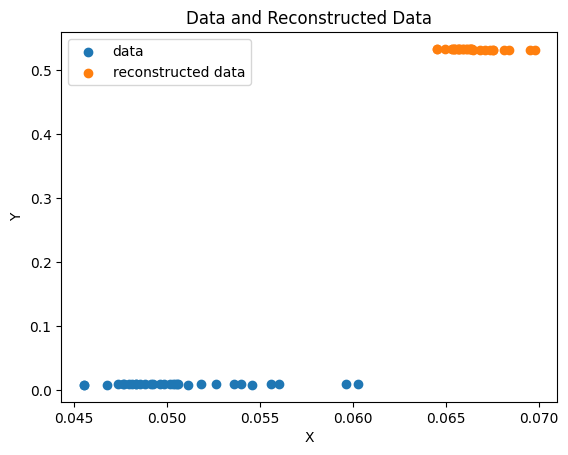

[[0.04556077 0.00761565]
 [0.04553577 0.00791633]]


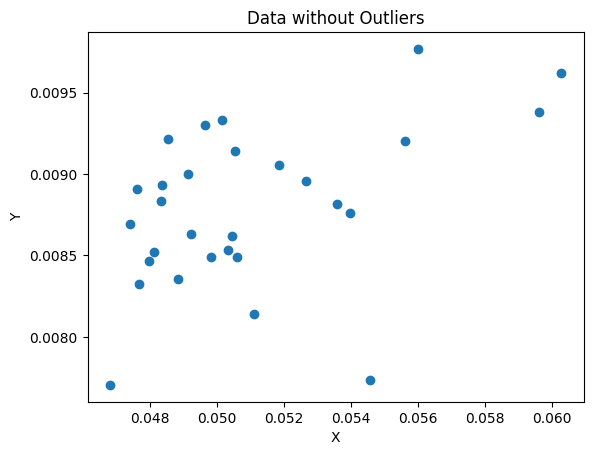

In [5]:
# 构建自编码器模型
input_dim = 2
encoding_dim = 1
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.ReLU())

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_dim, encoding_dim)

# 定义优化器和损失函数
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# 训练模型
num_epochs = 100
batch_size = 32
losses = []
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        batch_data = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        optimizer.zero_grad()
        outputs = autoencoder(batch_data)
        loss = criterion(outputs, batch_data)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

# 预测并可视化重构数据
data_tensor = torch.tensor(X_train, dtype=torch.float32)
preds_tensor = autoencoder(data_tensor)
preds = preds_tensor.detach().numpy()
plt.scatter(X_train[:, 0], X_train[:, 1], label='data')
plt.scatter(preds[:, 0], preds[:, 1], label='reconstructed data')
plt.legend()
plt.title('Data and Reconstructed Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 计算重构误差
mse = np.mean(np.power(X_train - preds, 2), axis=1)

# 设定阈值并剔除异常值
threshold = np.percentile(mse, 95)
clean_data = X_train[mse <= threshold]
outliers = X_train[mse > threshold]
print(outliers)
# 可视化处理后的数据
plt.scatter(clean_data[:, 0], clean_data[:, 1])
plt.title('Data without Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# 这个示例中，我们使用PyTorch构建了一个简单的自编码器模型，并使用均方误差（MSE）作为损失函数进行训练。然后，将原始数据和预测的重构数据可视化。接着，计算重构误差，并将重构误差超过95%分位数的数据点视为异常值，并将其从原始数据中删除。最后，可视化处理后的数据。

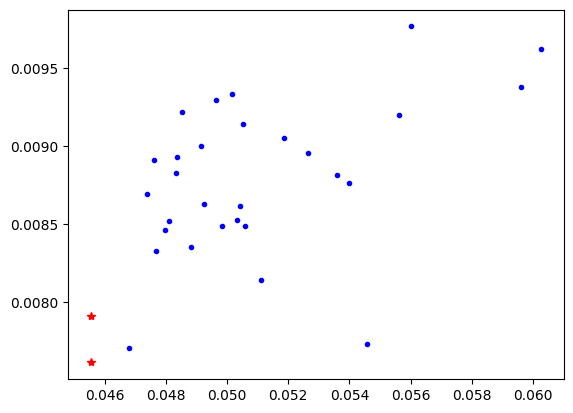

In [6]:
plt.plot(clean_data[:, 0],clean_data[:, 1],'b.')
plt.plot(outliers[:, 0],outliers[:, 1],'r*')